In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# # Interactive plots
# %matplotlib notebook

# Load all packages used
import matplotlib.pyplot as plt
import numpy as np
import mypackage

TensorFlow version is 2.1.0


Using TensorFlow backend.


### The manualy labeled real dataset from day 2 at Tomra

In [ ]:
# Load the real dataset
X, Y, info = mypackage.Dataset.load("data/tomra", only_with_contaminant=True)
X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=0.3)

X_test, X_train, scaler = mypackage.Dataset.scale(X_test, X_train, scaler='GlobalStandardization')
# X_test, X_train = mypackage.Dataset.PCA(X_test, X_train, n_components=3, plot=True, whiten=True)

print(np.unique(Y_test), Y_test.shape, (X_test.min(), X_test.max()), X_test.shape)

### The manualy labeled real dataset from day 1 at Tomra

In [4]:
# Load the real dataset
X, Y, info = mypackage.Dataset.load("data/tomra_day1", only_with_contaminant=True)
X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=0.3)

X_test, X_train, scaler = mypackage.Dataset.scale(X_test, X_train, scaler='GlobalStandardization')
# X_test, X_train = mypackage.Dataset.PCA(X_test, X_train, n_components=3, plot=True, whiten=True)

print(np.unique(Y_test), Y_test.shape, (X_test.min(), X_test.max()), X_test.shape)

[2] (2, 100, 100, 1) (-5.499682, 4.216521) (2, 100, 100, 208)


### Then the fake dataset, which, is by default a absorbance dataset.
In order to use it as a pre-taining dataset for the TOMRA dataset, then either one of them need to converterd to absorbance or reflectance like the other.

In [ ]:
# Setting the wavelengths to be the same as the real dataset collected at TOMRA
wavelengths = mypackage.Dataset.TOMRA_WAVELENGTHS

# The fake dataset is by default a absorbance dataset
fake_data = mypackage.FakeDataset(wavelengths=wavelengths)
X, Y = fake_data.get_images(50)

### Enriching the real dataset from day 2 at Tomra

In [ ]:
# First load the labeled data and train on it
X_orig, Y_orig, info = mypackage.Dataset.load("data/tomra", only_with_contaminant=False)

X, Y = mypackage.Dataset.make_zoomed_in_dataset(X_orig, Y_orig, size=32, sample_multiplication=7, contaminant_type=3)

### Load the rest of the images from day 2 at Tomra and enrich them

In [ ]:
# Dictionary overwrites the previous key-entery
image_centers = {'chicken_01': (27, 58), 'chicken_01': (77, 70), 'chicken_02': (22, 42),
                 'chicken_02': (75, 51), 'chicken_03': (28, 45), 'chicken_03': (75, 72),
                 'chicken_04': (22, 63), 'chicken_04': (70, 79), 'chicken_05': (19, 90),
                 'chicken_05': (80, 90), 'fillet_FM_01': (38, 51), 'fillet_FM_02': (57, 60),
                 'fillet_FM_03': (50, 33), 'fillet_FM_05': (34, 66), 'fillet_FM_06': (31, 68),
                 'fillet_FM_07': (39, 60), 'fillet_FM_08': (37, 64), 'fillet_FM_09': (34, 50),
                 'fillet_FM_10': (37, 54), 'fillet_FM_11': (48, 34), 'fillet_FM_12': (37, 55),
                 'fillet_v2_FM_01': (44, 60), 'fillet_v2_FM_02': (44, 51), 'fillet_v2_FM_03': (26, 46),
                 'fillet_v2_FM_04': (41, 55), 'fillet_v2_FM_05': (34, 70), 'fillet_v2_FM_06': (34, 56),
                 'fillet_v2_FM_07': (31, 65), 'fillet_v2_FM_08': (44, 56), 'fillet_v2_FM_09': (33, 59),
                 'fillet_v2_FM_10': (44, 71), 'fillet_v2_FM_11': (45, 55), 'FM_02': (57, 60),
                 'FM_03': (60, 37), 'FM_04': (72, 54), 'FM_05': (52, 46), 'FM_06': (52, 49),
                 'FM_07': (61, 49), 'FM_08': (42, 55), 'FM_09': (54, 50), 'FM_10': (56, 39),
                 'leg_meat_FM_01': (43, 52), 'leg_meat_FM_02': (36, 72), 'leg_meat_FM_03': (64, 55),
                 'leg_meat_FM_04': (56, 54), 'leg_meat_FM_05': (36, 51), 'leg_meat_FM_06': (43, 59),
                 'leg_meat_FM_07': (48, 54), 'leg_meat_FM_08': (53, 81), 'leg_meat_FM_09': (61, 41),
                 'leg_meat_FM_10': (48, 60), 'leg_meat_FM_11': (53, 55), 'leg_meatside_01': (39, 82),
                 'leg_meatside_02': (44, 69), 'leg_meatside_03': (38, 54), 'leg_meatside_04': (58, 51),
                 'leg_skin_FM_01': (44, 62), 'leg_skin_FM_02': (44, 55), 'leg_skin_FM_03': (32, 56),
                 'leg_skin_FM_04': (39, 63), 'leg_skin_FM_05': (45, 52), 'leg_skin_FM_06': (56, 58),
                 'leg_skin_FM_07': (44, 67), 'leg_skin_FM_08': (46, 55), 'leg_skin_FM_09': (49, 44),
                 'leg_skin_FM_10': (52, 76), 'leg_skin_FM_11': (50, 50), 'leg_skinside_01': (45, 62),
                 'leg_skinside_04': (45, 53), 'leg_skinside_05': (56, 45), 'leg_skinside_12': (52, 56),
                 'leg_skinside_13': (45, 44), 'leg_skinside_22': (59, 64), 'leg_skinside_23': (58, 78)}
file_list = list(image_centers.keys())
dataset_folder = "data/tomra_day1"
X = mypackage.Dataset.load_files(file_list, dataset_folder, with_labels=False)
_, X, _ = mypackage.Dataset.scale(None, X, scaler=scaler)

size = 32
count, _, _, k = X.shape
X_test = np.zeros((count, size, size, k))
for i, file in enumerate(file_list):
    x, y = image_centers[file]
    X_test[i] = mypackage.Dataset.zoom_in_on_center(X[i], x, y, size=32)

print((X_test.min(), X_test.max()), X_test.shape)

### Data scaling and test train splitting

In [ ]:
X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=0.3)

X_test, X_train = mypackage.Dataset.scale(X_test, X_train, scale='GlobalStandardization')
# X_test, X_train = mypackage.Dataset.PCA(X_test, X_train, n_components=3, plot=True, whiten=True)

print(np.unique(Y_test), Y_test.shape, (X_test.min(), X_test.max()), X_test.shape)

### Example of plotting all the labels along with one selected channel

(5, 100, 100, 1)

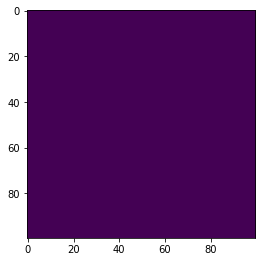

In [13]:
for i in range(len(X_test)):
    plt.figure(figsize=(9, 5))
    plt.subplot(121)
    plt.imshow(np.squeeze(Y[i]))
    break
# X_test, X_train
Y.shape

### Load all files in one folder and examine

In [24]:
dataset_folder = 'data/tomra_day1'
file_list = ['fillet_FM_02', 'fillet_FM_08', 'fillet_FM_10', 'fillet_v2_FM_02', 'fillet_v2_FM_06', 'fillet_v2_FM_08', 'fillet_v2_FM_11', 'FM_02', 'FM_03', 'FM_04', 'FM_05', 'FM_08', 'FM_09', 'FM_10', 'leg_meat_FM_03', 'leg_meat_FM_05', 'leg_skin_FM_01', 'leg_skin_FM_02', 'leg_skin_FM_04', 'leg_skin_FM_05', 'leg_skin_FM_07', 'leg_skinside_01', 'leg_skinside_04', 'leg_skinside_05', 'leg_skinside_12', 'leg_skinside_13', 'leg_skinside_22', 'leg_skinside_23']
# ['chicken_01', 'chicken_02', 'chicken_03', 'chicken_04', 'chicken_05', 'fillet_FM_01', 'fillet_FM_02', 'fillet_FM_03', 'fillet_FM_05', 'fillet_FM_06', 'fillet_FM_07', 'fillet_FM_08', 'fillet_FM_09', 'fillet_FM_10', 'fillet_FM_11', 'fillet_FM_12', 'fillet_v2_FM_01', 'fillet_v2_FM_02', 'fillet_v2_FM_03', 'fillet_v2_FM_04', 'fillet_v2_FM_05', 'fillet_v2_FM_06', 'fillet_v2_FM_07', 'fillet_v2_FM_08', 'fillet_v2_FM_09', 'fillet_v2_FM_10', 'fillet_v2_FM_11', 'FM_02', 'FM_03', 'FM_04', 'FM_05', 'FM_06', 'FM_07', 'FM_08', 'FM_09', 'FM_10', 'FM_11', 'leg_meat_FM_01', 'leg_meat_FM_02', 'leg_meat_FM_03', 'leg_meat_FM_04', 'leg_meat_FM_05', 'leg_meat_FM_06', 'leg_meat_FM_07', 'leg_meat_FM_08', 'leg_meat_FM_09', 'leg_meat_FM_10', 'leg_meat_FM_11', 'leg_meatside_01', 'leg_meatside_02', 'leg_meatside_03', 'leg_meatside_04', 'leg_skin_FM_01', 'leg_skin_FM_02', 'leg_skin_FM_03', 'leg_skin_FM_04', 'leg_skin_FM_05', 'leg_skin_FM_06', 'leg_skin_FM_07', 'leg_skin_FM_08', 'leg_skin_FM_09', 'leg_skin_FM_10', 'leg_skin_FM_11', 'leg_skinside_01', 'leg_skinside_04', 'leg_skinside_05', 'leg_skinside_12', 'leg_skinside_13', 'leg_skinside_22', 'leg_skinside_23'] # All in folder

X = mypackage.Dataset.load_files(file_list, dataset_folder, with_labels=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



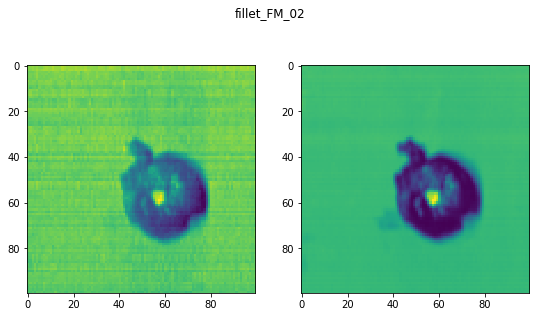

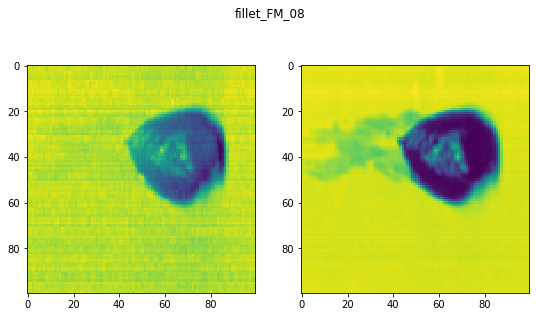

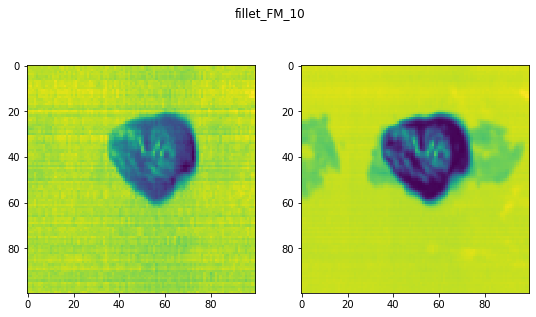

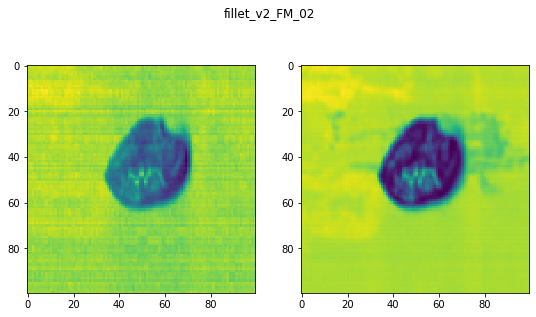

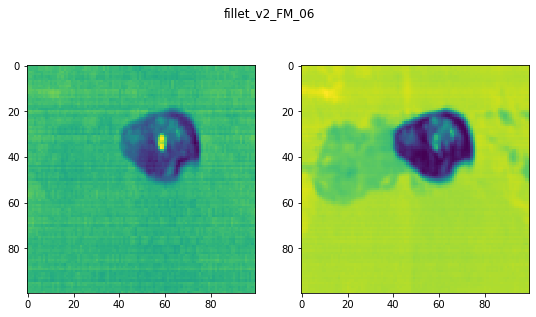

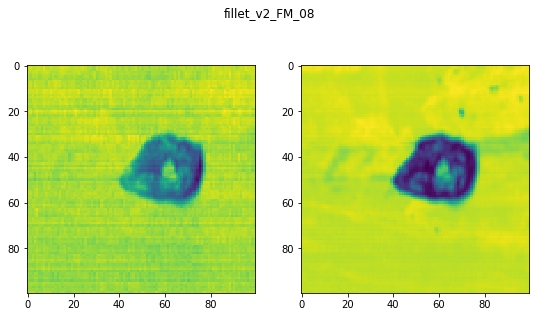

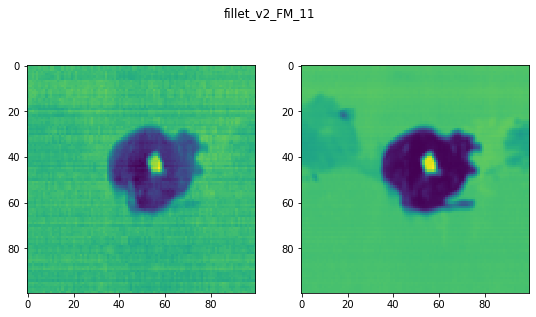

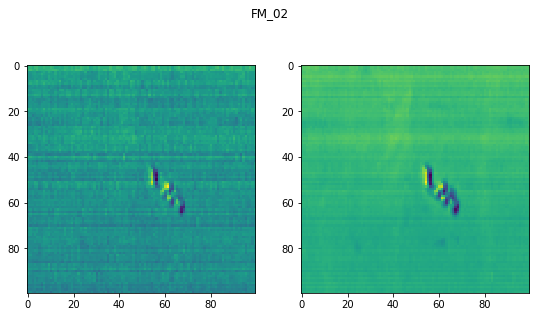

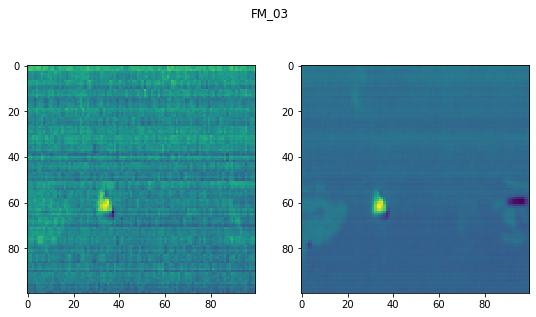

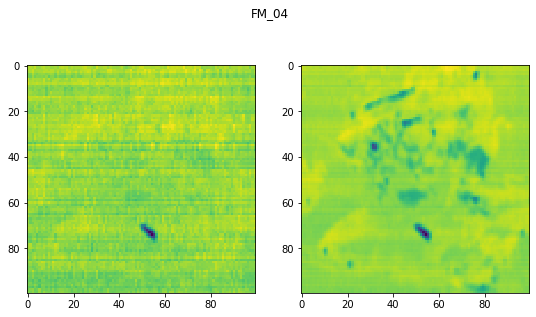

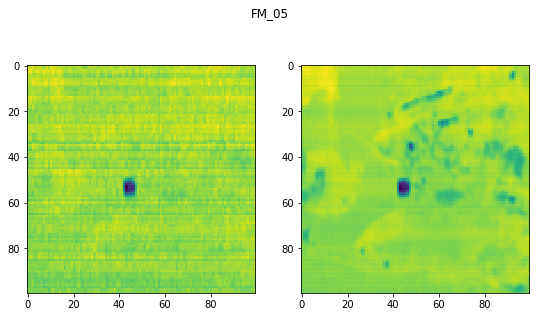

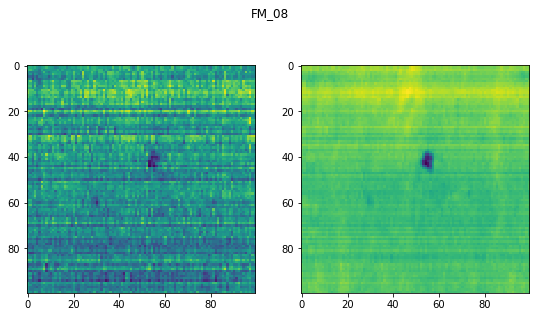

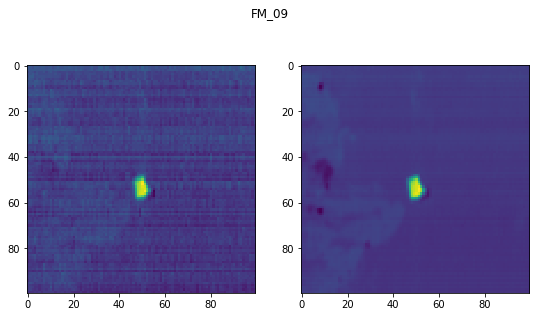

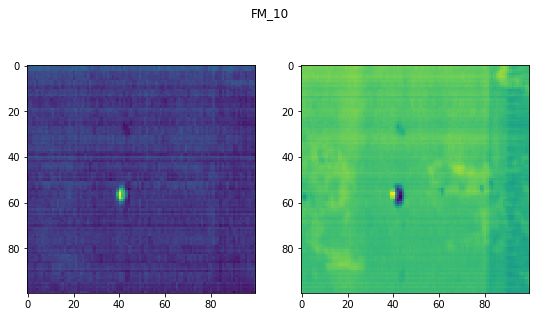

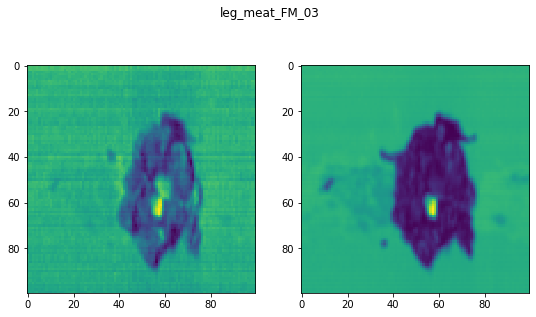

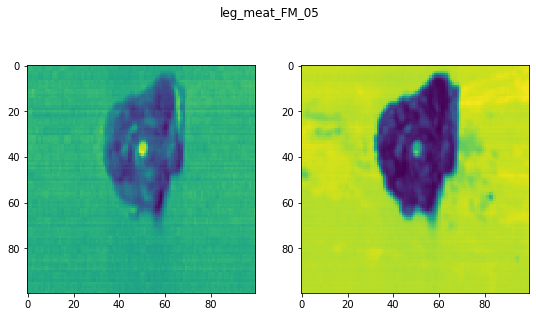

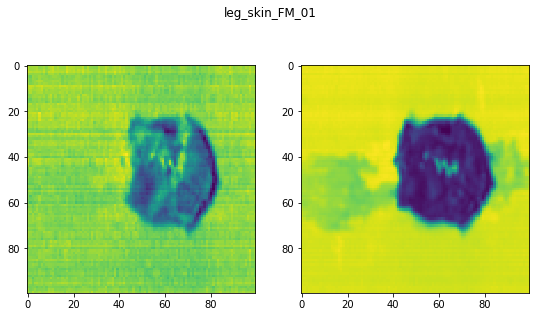

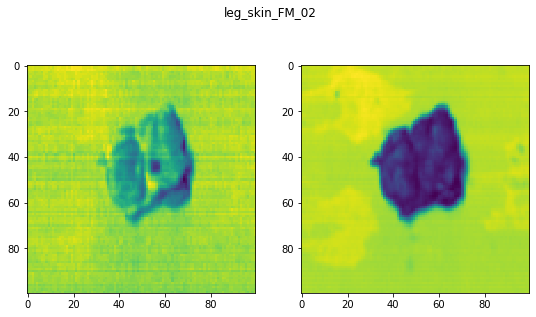

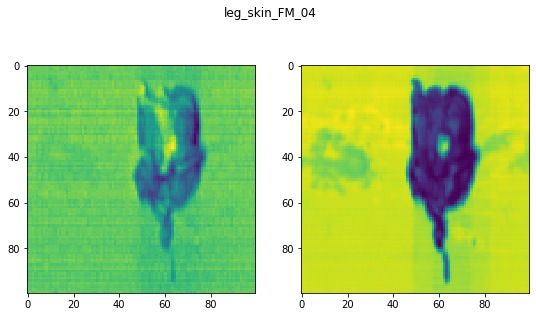

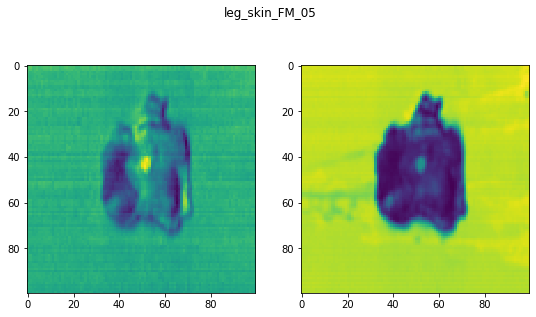

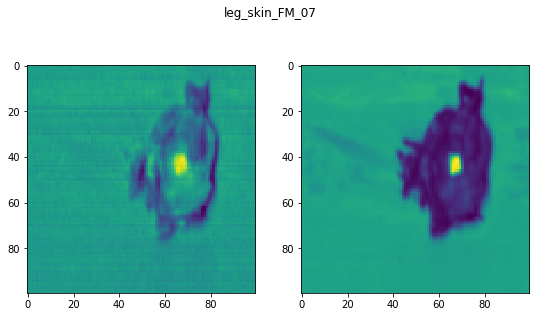

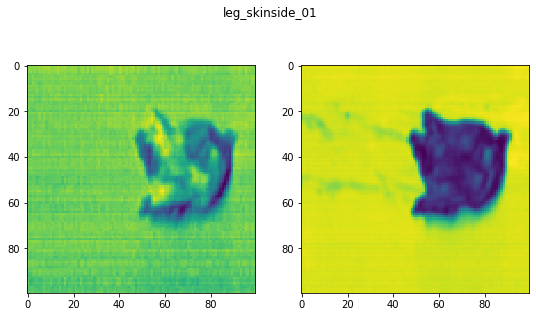

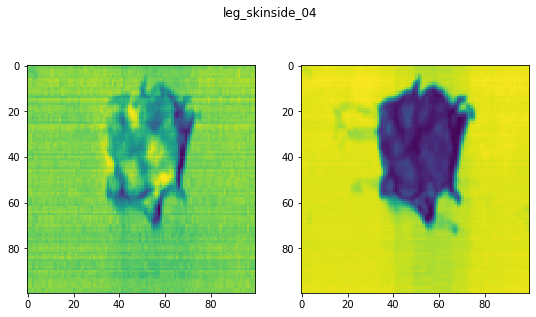

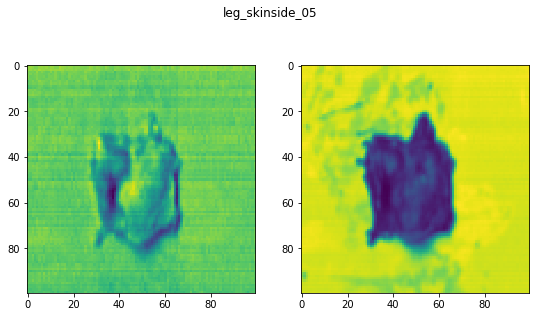

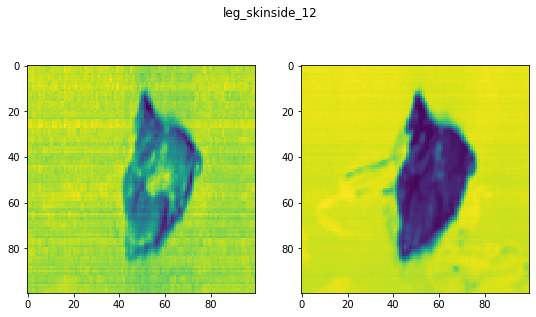

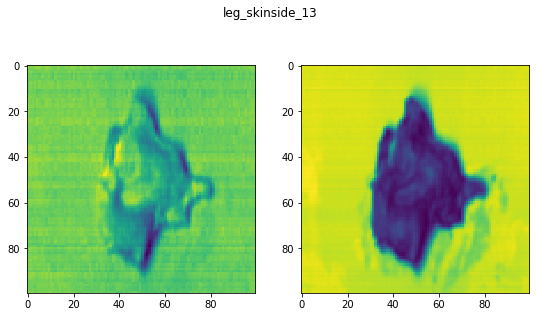

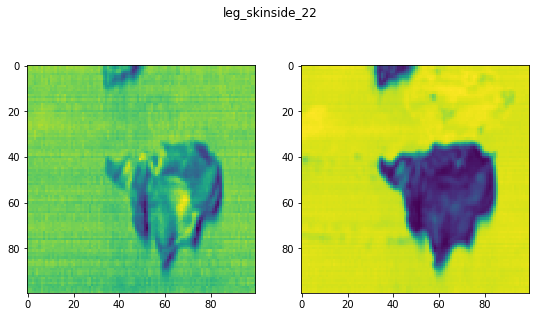

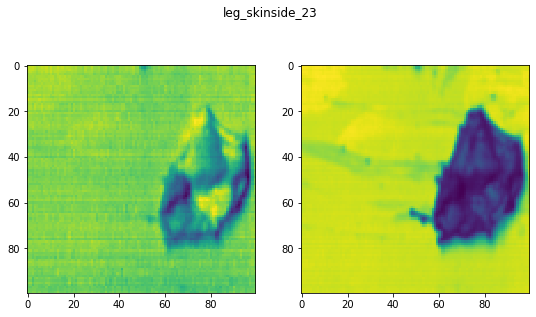

In [25]:
for i, file_name in enumerate(file_list):
    fig = plt.figure(figsize=(9, 5))
    fig.suptitle(file_name)
    plt.subplot(121)
    channel = 7
    plt.imshow(X[i, :, :, channel])
    plt.subplot(122)
    channel = 138
    plt.imshow(X[i, :, :, channel])
#     break